 ###  CTF Challenge: Visual Vortex - Decoding the Anomaly







**Dataset**: [U.S. International Air Traffic Statistics (1990–2023)](https://www.transtats.bts.gov/)  
**Flag Format**: `CTF{Country_Year_Event}`  

 ## 📥 Setup & Data Loading (4 points)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = pd.read_csv(r"D:\Documents 2\VScode projects\ROBAI2\challenges\data\air_traffic.csv")

# dataset comprehension  (11 point)

### read and analyse the data then respond to these questions :

### Core Questions (must answer atleast 3 of these!! ) 

1. Which country has the highest total passenger traffic (1990–2023)?  
2. How is passenger traffic distributed across countries?  
3. Which year had the highest and lowest year-over-year (YoY) passenger growth?  
4. What is the average monthly passenger volume across all years?  
5. How is air freight volume distributed globally?  

### Bonus Questions  

1. What is the average number of passengers per flight for each country?  
2. Which country has the highest number of recorded flights?  
3. Which month historically has the highest air traffic volume?  

### Advanced Bonus Questions  

1. Which country shows the strongest correlation between passenger traffic and freight volume?  
2. Are there seasonal patterns in air traffic for specific countries?  
3. Which country recovered fastest to pre-COVID (2019) passenger levels post-2020?  

Country with highest total passenger traffic: United States (577375553.0)


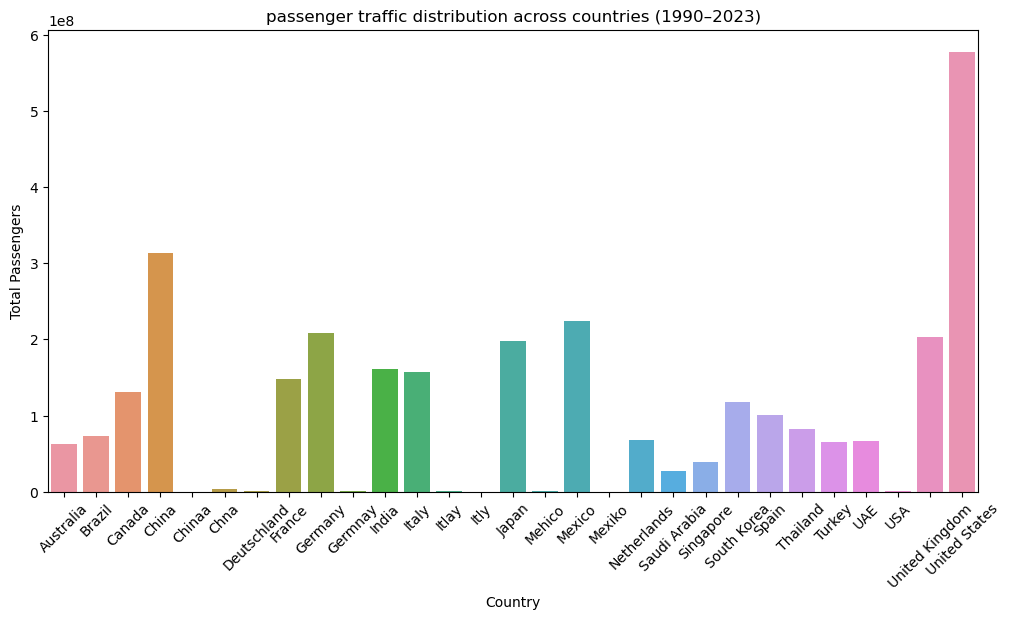

Year with highest YoY passenger growth: 2022
Year with lowest YoY passenger growth: 2020
Average monthly passenger volume: 378628.19


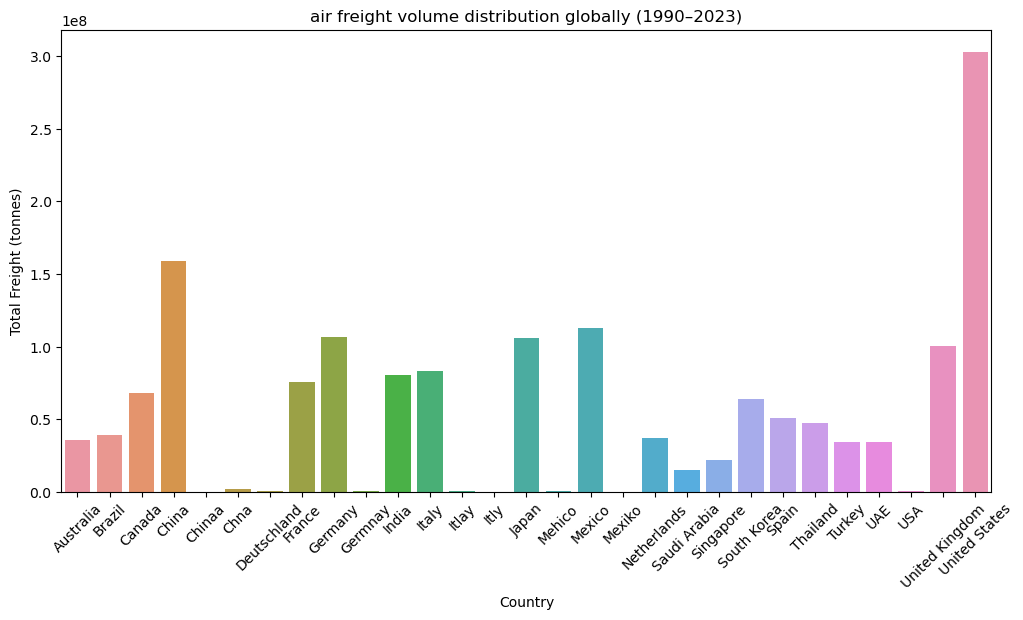

In [3]:
# 1. country with the highest total passenger traffic (1990–2023)
total_passengers_by_country = a.groupby('Country')['Passengers'].sum()
highest_passenger_country = total_passengers_by_country.idxmax()
highest_passenger_traffic = total_passengers_by_country.max()
print(f"Country with highest total passenger traffic: {highest_passenger_country} ({highest_passenger_traffic})")

# 2. passenger traffic distribution across countries
plt.figure(figsize=(12, 6))
sns.barplot(x=total_passengers_by_country.index, y=total_passengers_by_country.values)
plt.title("passenger traffic distribution across countries (1990–2023)")
plt.ylabel("Total Passengers")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# 3. year witht the highest and lowest year-over-year (YoY) passenger growth
a['Total_Passengers_Per_Year'] = a.groupby('Year')['Passengers'].transform('sum')
a['YoY_Growth'] = a['Total_Passengers_Per_Year'].pct_change() * 100
highest_growth_year = a.loc[a['YoY_Growth'].idxmax(), 'Year']
lowest_growth_year = a.loc[a['YoY_Growth'].idxmin(), 'Year']
print(f"Year with highest YoY passenger growth: {highest_growth_year}")
print(f"Year with lowest YoY passenger growth: {lowest_growth_year}")

# 4. average monthly passenger volume across all years
average_monthly_passenger_volume = a['Passengers'].mean()
print(f"Average monthly passenger volume: {average_monthly_passenger_volume:.2f}")

# 5. air freight volume distribution globally
total_freight_by_country = a.groupby('Country')['Freight (tonnes)'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=total_freight_by_country.index, y=total_freight_by_country.values)
plt.title("air freight volume distribution globally (1990–2023)")
plt.ylabel("Total Freight (tonnes)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

 ## 🧩 Part 1: Data Inspection (5 points)
 **Q1** : How many missing values exist in the `Passengers` and `Flights` columns?  
 **Q2** : What is the time range of the dataset?

In [4]:
missing_values_flights = a['Flights'].isnull().sum()
missing_values_passengers = a['Passengers'].isnull().sum()
print(f"Missing values in flights: {missing_values_flights}")
print(f"Missing values in passengers: {missing_values_passengers}")

time_range = a['Year'].unique()
time_range.sort()
print(f"Time range of the dataset: {time_range[0]} to {time_range[-1]}")

Missing values in flights: 142
Missing values in passengers: 142
Time range of the dataset: 1990 to 2023


## 🛠️ Part 2: Data Augmentation  (10 points)
 **Q3**: Clean the dataset. Justify your strategy.  
 **Q4**: Create `Passengers_per_Flight` and `YoY_Growth`. What do they measure?

In [5]:
a = a.dropna()
a = a.drop_duplicates()
a = a.reset_index(drop=True)
a = a.rename(columns={'Freight (tonnes)': 'Freight'})

# Fixing country names to ensure consistency
a['Country'] = a['Country'].replace({
    'Chinaa': 'China',
    'Chna': 'China',
    'Mexiko': 'Mexico',
    'Germnay': 'Germany',
    'Deutschland': 'Germany',
    'Itly': 'Italy',
    'United States': 'USA',
    'Mehico': 'Mexico',
    'Itlay': 'Italy'
})

# Dropping rows with invalid or inconsistent data
a = a[a['Passengers'] > 0]  
a = a[a['Flights'] > 0]     
a = a[a['Freight'] > 0]     

a = a.reset_index(drop=True)
# Save the cleaned DataFrame to a new file
a.to_csv(r"D:\Documents 2\VScode projects\ROBAI2\challenges\data\air_traffic_cleaned.csv", index=False)

## 📈 Part 3: Time Series Visualization (10 point)
 **Q5**: Plot passenger trends for a country. What anomalies exist?  
 **Q6**: Add a rolling average. What long-term trend emerges?

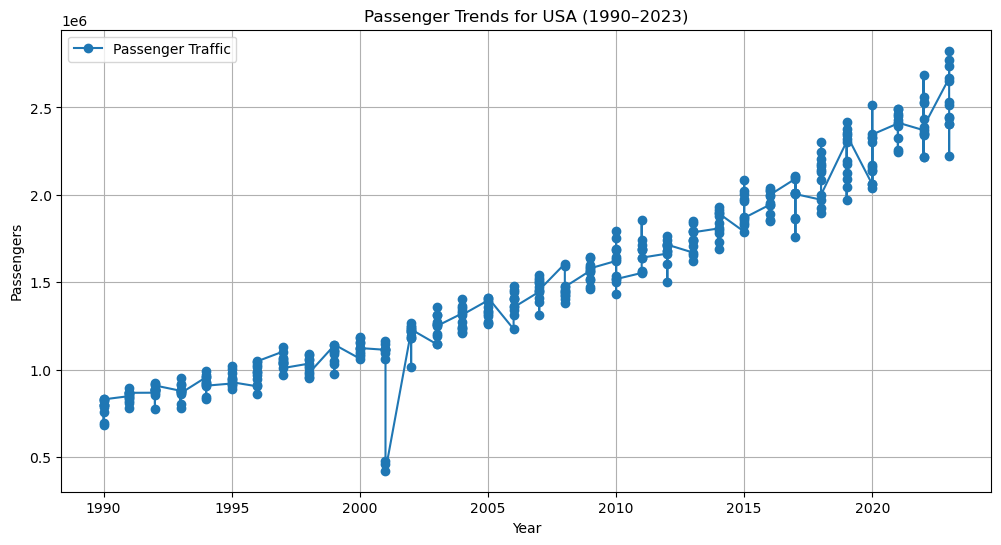

september happened lol! and apparently americans didn't care for the pandemic


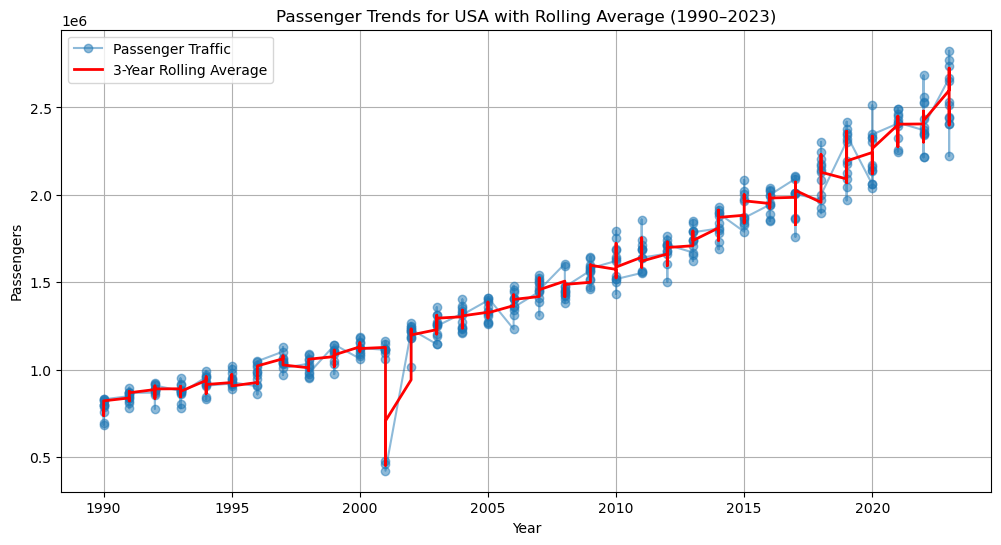

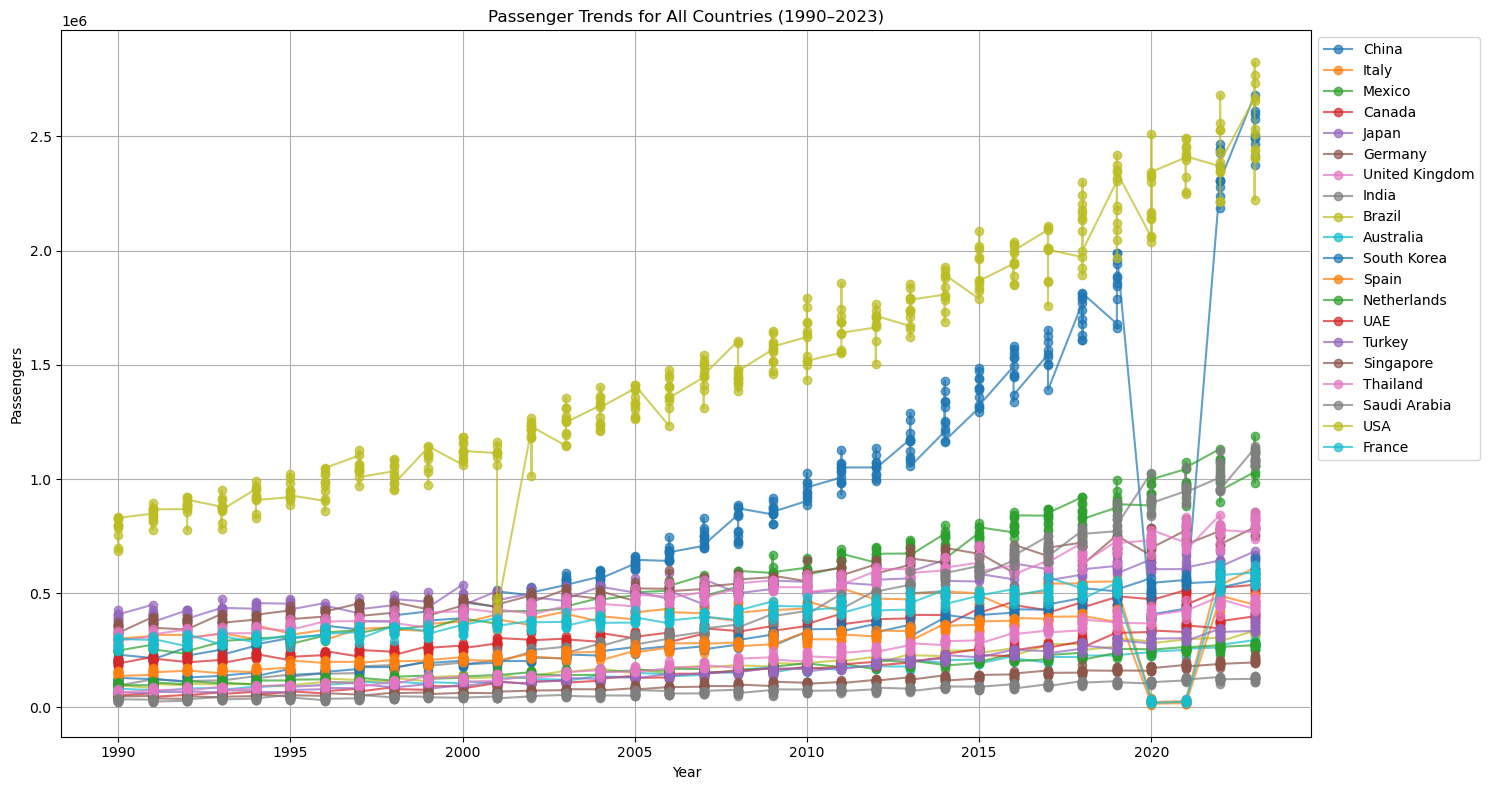

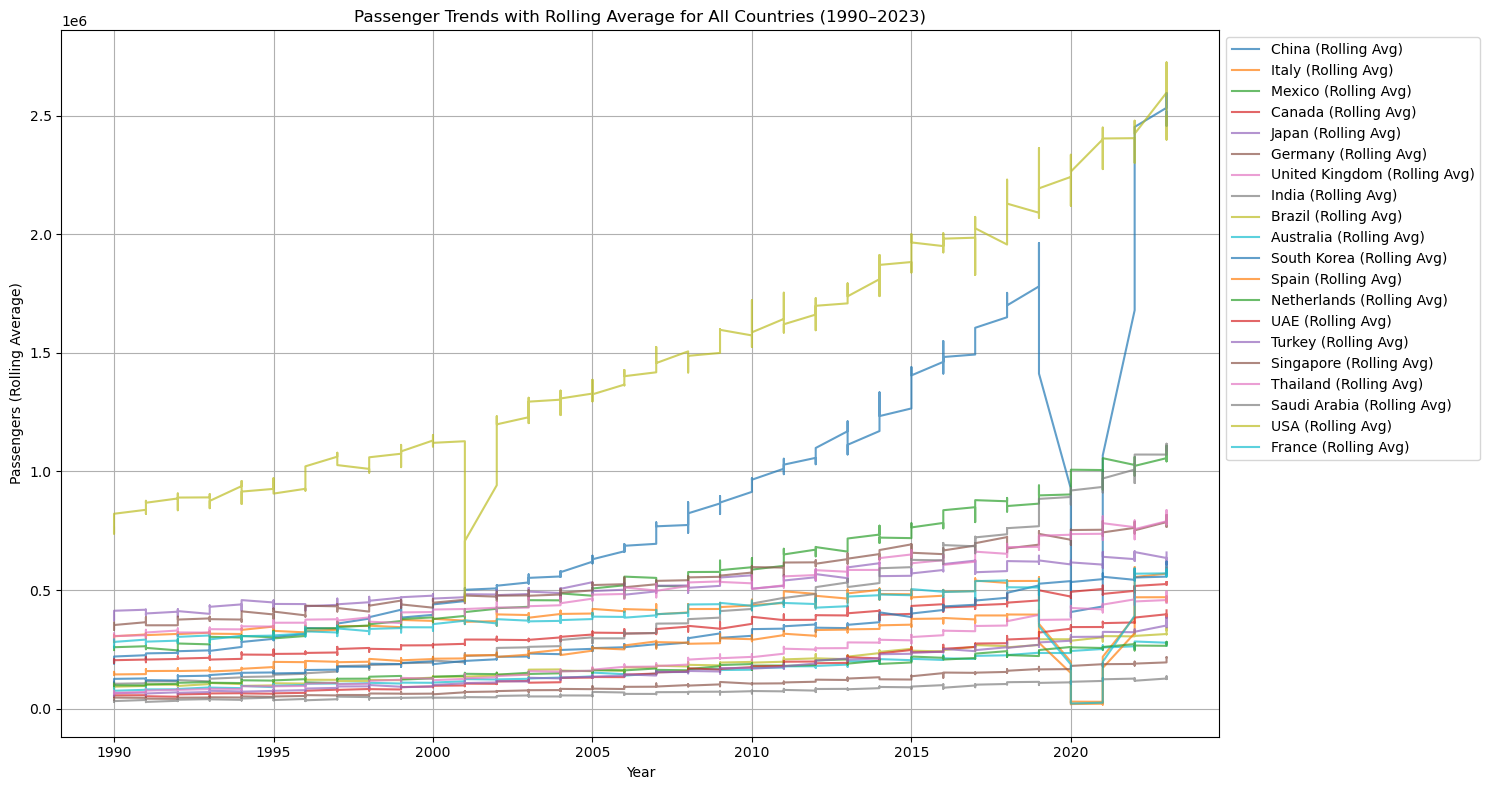

i guess what we could make out of these is that september 11th was a big deal for the us, and the pandemic was a big deal for everyone but the us


In [6]:
# Plot passenger trends for a specific country (e.g., 'USA')
usa_data = a[a['Country'] == 'USA']
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['Passengers'], label='Passenger Traffic', marker='o')
plt.title('Passenger Trends for USA (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()
print("september happened lol! and apparently americans didn't care for the pandemic") 

# Add a rolling average to smooth the trend
usa_data = a[a['Country'] == 'USA'].copy()
usa_data['Rolling_Avg'] = usa_data['Passengers'].rolling(window=3, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['Passengers'], label='Passenger Traffic', marker='o', alpha=0.5)
plt.plot(usa_data['Year'], usa_data['Rolling_Avg'], label='3-Year Rolling Average', color='red', linewidth=2)
plt.title('Passenger Trends for USA with Rolling Average (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Plot passenger trends for all countries in one figure
plt.figure(figsize=(15, 8))
for country in a['Country'].unique():
    country_data = a[a['Country'] == country]
    plt.plot(country_data['Year'], country_data['Passengers'], label=country, marker='o', alpha=0.7)

plt.title('Passenger Trends for All Countries (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate rolling average for all countries and plot them
plt.figure(figsize=(15, 8))
for country in a['Country'].unique():
    country_data = a[a['Country'] == country].copy()
    country_data['Rolling_Avg'] = country_data['Passengers'].rolling(window=3, center=True).mean()
    plt.plot(country_data['Year'], country_data['Rolling_Avg'], label=f'{country} (Rolling Avg)', alpha=0.7)

plt.title('Passenger Trends with Rolling Average for All Countries (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers (Rolling Average)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

print("i guess what we could make out of these is that september 11th was a big deal for the us, and the pandemic was a big deal for everyone but the us")

## 🌍 Part 4: Geospatial Visualization (recommended) (10 points)
 **Q7**: Map freight volume by country. Which regions are outliers?  
 **Q8**: Did freight to China drop in 2022?

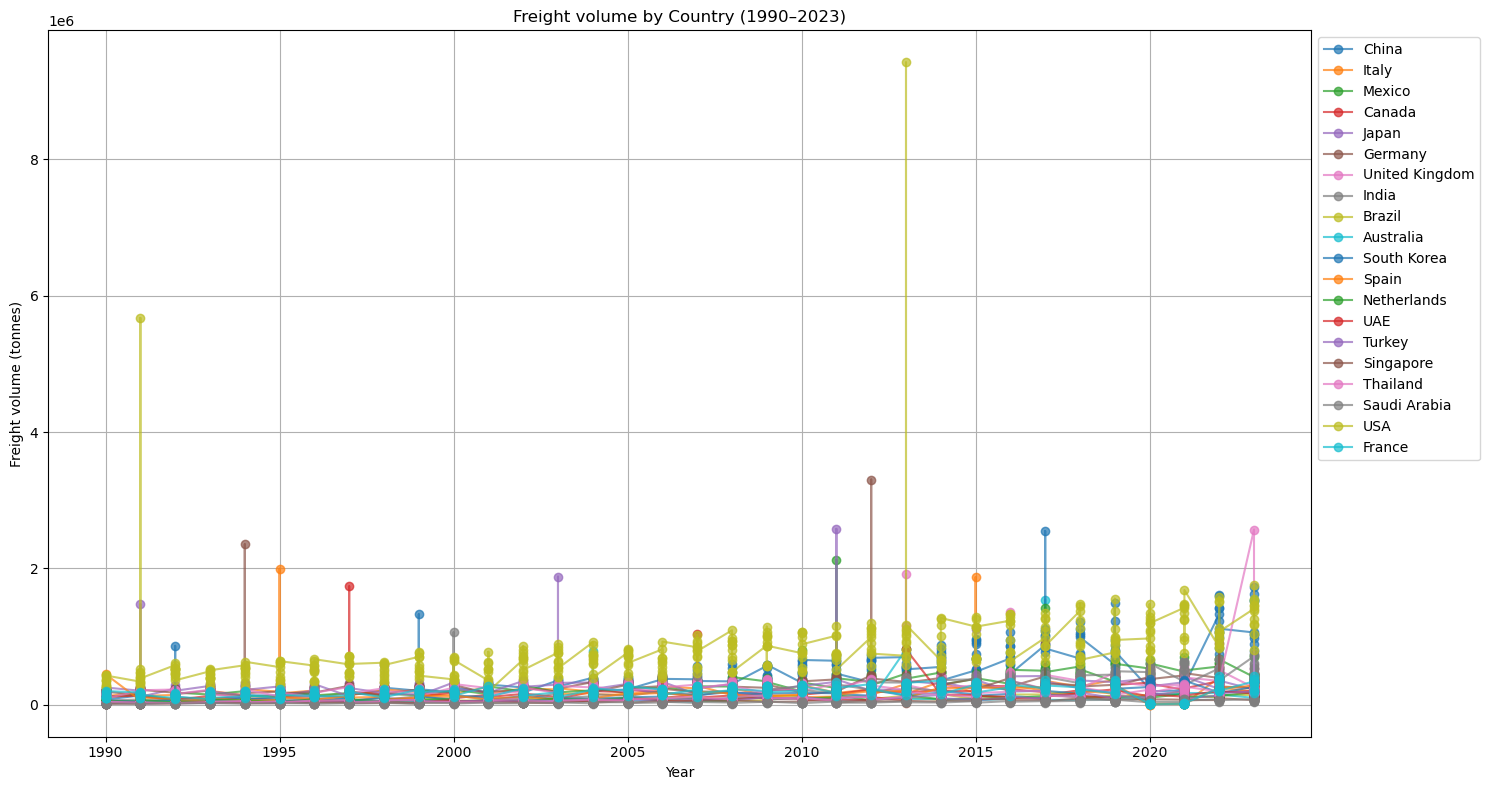

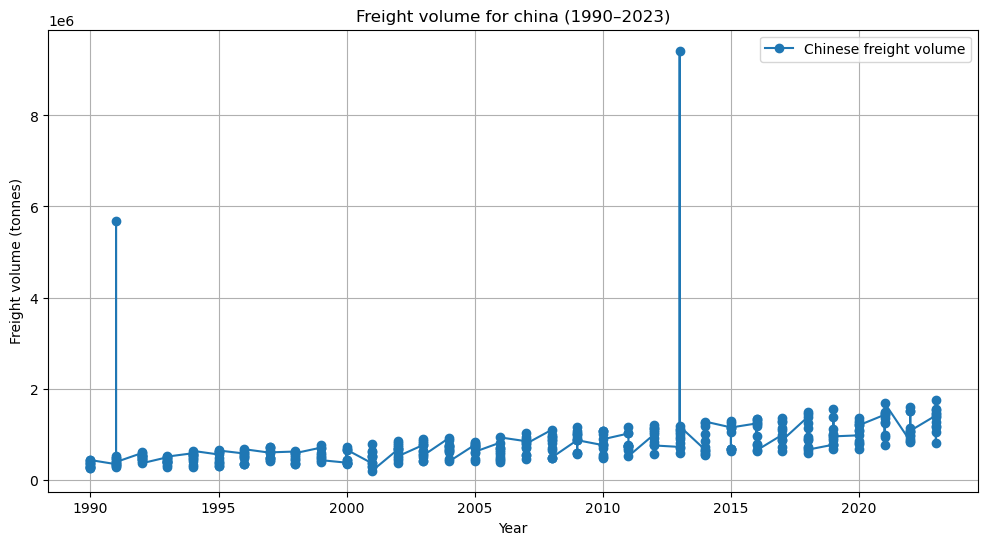

In [7]:
plt.figure(figsize=(15, 8))
for country in a['Country'].unique():
    country_data = a[a['Country'] == country]
    plt.plot(country_data['Year'], country_data['Freight'], label=country, marker='o', alpha=0.7)

plt.title('Freight volume by Country (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Freight volume (tonnes)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

China_data = a[a['Country'] == 'China']
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['Freight'], label='Chinese freight volume', marker='o')
plt.title('Freight volume for china (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Freight volume (tonnes)')
plt.legend()
plt.grid(True)
plt.show()

## 🔗 Part 5: Correlation Analysis (10 points)
 **Q9**: Are passengers, flights, and freight strongly correlated?  
 **Q10**: Do clusters emerge in the 3D plot?

## 🚨 Part 6: Anomaly Detection (15 points)
 **Q11**: What’s the worst YoY passenger drop?  
 **Q12**: What event caused it?

## 🏁 Part 7: Flag Submission (30 point)
**Q13**: Submit your flag as `CTF{Country_Year_Event}`.


 ## 🎯 Bonus Points (Advanced Techniques)
 **Extra credit will be awarded for implementing the following methods:**  

        * **Dimensionality Reduction (PCA)**

        * **Time Series Decomposition**

        * **Clustering (K-Means/DBSCAN)**  

        
 ---
 **Scoring Boost**:  
 - **+15%**: For implementing PCA + Clustering  
 - **+10%**: For time series decomposition or automated anomaly detection
 - **+20%**: for  creative / original ideas or implimentations  (justifications and context  will also be considered )
 